## Practical 1 - preprocessing

- lowercase
- remove HTML tags
- remove URLs, remove punctuations,
- chat word treatment - that is convert short forms to full texts,
- stop words removal,
- handling emoji,
- tokenization,
- stemming - removes suffix,
- lemmatization - convert to root word using dictionary

In [1]:
!pip install nltk

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
text_document = "Punkt is a pre-trained model that helps segment text into sentences and tokenize words. It’s commonly used to break down a large piece of text into sentences and words"

In [4]:
# converting to smaller
text_document = text_document.lower()
text_document

'punkt is a pre-trained model that helps segment text into sentences and tokenize words. it’s commonly used to break down a large piece of text into sentences and words'

In [5]:
# remove punctuations
import string
def remove_punc(text):
  # getting the punctuations
  exclude = string.punctuation
  # str.maketrans('word to replace', 'with which word to replace', list of characters we wan't to remove entirely)
  # this creates table mapping for words
  # text.translate - apply the translation table to the string
  return text.translate(str.maketrans('','',exclude))

In [6]:
text_document = remove_punc(text_document)
text_document

'punkt is a pretrained model that helps segment text into sentences and tokenize words it’s commonly used to break down a large piece of text into sentences and words'

In [ ]:
# if para given we can sentence tokenize it first
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(text_document)
sentences

In [8]:
# tokenize words
nltk.download('punkt_tab')
words = word_tokenize(text_document)
words

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['punkt',
 'is',
 'a',
 'pretrained',
 'model',
 'that',
 'helps',
 'segment',
 'text',
 'into',
 'sentences',
 'and',
 'tokenize',
 'words',
 'it',
 '’',
 's',
 'commonly',
 'used',
 'to',
 'break',
 'down',
 'a',
 'large',
 'piece',
 'of',
 'text',
 'into',
 'sentences',
 'and',
 'words']

In [10]:
# stop words removal
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]
filtered_words

['punkt',
 'pretrained',
 'model',
 'helps',
 'segment',
 'text',
 'sentences',
 'tokenize',
 'words',
 '’',
 'commonly',
 'used',
 'break',
 'large',
 'piece',
 'text',
 'sentences',
 'words']

In [11]:
copy1 = filtered_words.copy()
# stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in copy1]
stemmed_words

['punkt',
 'pretrain',
 'model',
 'help',
 'segment',
 'text',
 'sentenc',
 'token',
 'word',
 '’',
 'commonli',
 'use',
 'break',
 'larg',
 'piec',
 'text',
 'sentenc',
 'word']

In [12]:
copy2 = filtered_words.copy()
lemmatize = WordNetLemmatizer()
lemmatized_words = [lemmatize.lemmatize(word) for word in copy2]
lemmatized_words

['punkt',
 'pretrained',
 'model',
 'help',
 'segment',
 'text',
 'sentence',
 'tokenize',
 'word',
 '’',
 'commonly',
 'used',
 'break',
 'large',
 'piece',
 'text',
 'sentence',
 'word']

## Practical 2

In [13]:
# documents
documents = {
        1: "The quick brown fox jumps over the lazy dog",
        2: "The dog is lazy but the fox is quick",
        3: "A quick brown fox jumps over a lazy dog",
        4: "Dogs are great companions",
        5: "Foxes are clever and quick"
}

In [14]:
# defaultdict - sub class of dictionary class that returns dictionary like object
# the functionality of this is same is dictionary, but defaultdict never raises
# a KeyError if we try to access a key that is not present in the dictionary

# here when we try to access a key and we don't find it then the factory method (or the datastructure like set, list,empty string, etc)
# mentioned in the defaultdict(), it inserts the key in the dictionary with that specified datastructure
from collections import defaultdict
index = defaultdict(set)

In [15]:
# take each of the document and id
# split the doc into tokens, lower them
# iterate on the tokens and add the doc_id to each of the token in the dict
for doc_id, doc in documents.items():
  tokens = doc.lower().split()
  for token in tokens:
    index[token].add(doc_id)

In [18]:
# if we directly try to access like index["quick"]
# then if key exists - returns the document id
# if not then it inserts this token into the index and initialize it's value with the factory method like empty list, set
# during the creation of index

# here as we are using the .get(query term, what to return if this key not found)
# if the key not found then the token/key is not inserted in the index and the second argument - which can be an empty set, empty list, or a string message
# would be returned
query_term = "quick"
result = index.get(query_term.lower(), "not in the index")
result

'not in the index'

In [19]:
# printing all the terms in the index
for term, doc_set in index.items():
  print(term, " ", doc_set)

the   {1, 2}
quick   {1, 2, 3, 5}
brown   {1, 3}
fox   {1, 2, 3}
jumps   {1, 3}
over   {1, 3}
lazy   {1, 2, 3}
dog   {1, 2, 3}
is   {2}
but   {2}
a   {3}
dogs   {4}
are   {4, 5}
great   {4}
companions   {4}
foxes   {5}
clever   {5}
and   {5}


In [20]:
# as here this token not exists and we are directly accessing
# so no this token would be added to the dictionary with the set as the value (as we passed the set during index creation)
print(index['nigga'])

set()


In [21]:
for term, doc_set in index.items():
  print(term, " ", doc_set)

the   {1, 2}
quick   {1, 2, 3, 5}
brown   {1, 3}
fox   {1, 2, 3}
jumps   {1, 3}
over   {1, 3}
lazy   {1, 2, 3}
dog   {1, 2, 3}
is   {2}
but   {2}
a   {3}
dogs   {4}
are   {4, 5}
great   {4}
companions   {4}
foxes   {5}
clever   {5}
and   {5}
nigga   set()


## Practical 3

Bayesian Network / bayesian belief network

- probabilistic graph model that represents set of variables and their conditional dependency via a DAG (directed acyclic graph)

- nodes = variables, arrows = dependency

In [22]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.9 MB/s eta 0:00:00


In [23]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, ParameterEstimator, BayesianEstimator
from pgmpy.inference import VariableElimination

In [26]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/be sem 1 practical/heart (1).csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [27]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

In [30]:
# creating instance of bayesian network
# here the tuples indicate the directed edges / relationships
# the first variable is considered to influence / is the parent of the second variable
# in the same tuple
# eg. age influences condition/target, cholestrol influences condition/target, etc
model = BayesianNetwork([
    ('age', 'target'),
    ('sex', 'target'),
    ('cp', 'target'),
    ('trestbps', 'target'),
    ('chol', 'target')
])

In [31]:
# learning parameters from the data
# for each node / feature in the dataset - it calculates the counts the occurrences of each possible value (for both node and parent)
# then based on counts calculate the probability of each node value for each of the configuration of the parent
model.fit(df, estimator=MaximumLikelihoodEstimator)

In [33]:
# to perform inference on probabilistic graphical models
# eliminate irrelevant variables by marginalizing over them and focus on imp variables
inference = VariableElimination(model)

In [36]:
# 21 - records for age 50
# 0 - 9
# 1 - 12

# predict the output (child) based on the influencing factor (parent)
query1 = inference.query(variables=['target'], evidence={'age':50})
print(query1)

# the model uses probability
# P(A/B) = P(A ∩ B) / P(B)

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5001 |
+-----------+---------------+
| target(1) |        0.4999 |
+-----------+---------------+


In [37]:
query2 = inference.query(variables=['target'],evidence={'chol' : 220})
print(query2)

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4996 |
+-----------+---------------+
| target(1) |        0.5004 |
+-----------+---------------+


In [38]:
query3 = inference.query(variables=['target'],evidence={'trestbps' : 140})
print(query3)

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5000 |
+-----------+---------------+
| target(1) |        0.5000 |
+-----------+---------------+


## Practical 4

In [68]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [50]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/be sem 1 practical/spam.csv', encoding='latin-1')
df = df.rename(columns={"v1" : "label", "v2" : "text"})

In [51]:
df = df.iloc[:,0:2]
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [52]:
df['label'] = df['label'].map({'ham' : 0, 'spam' : 1})

In [55]:
from nltk.corpus import words
import re
nltk.download('words')
valid_words = words.words()

def remove_non_dictionary_words(text):
  # [^] - used to negate the class, that is remove the words that don't belong to a-z, A-Z, \s - spaces, tabs, newlines
  words = re.sub(r'[^a-zA-Z\s]', '', text).split()
  cleaned_words = [word for word in words if word.lower() not in valid_words]
  return ' '.join(cleaned_words)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [56]:
df['text'] = df['text'].apply(remove_non_dictionary_words)

In [57]:
df

,label,text
0,0,jurong bugis amore
1,0,Ok Joking wif oni
2,1,wkly comp tkts questionstd txt rateTCs overs
3,0,hor
4,0,Nah usf lives
...,...,...
5567,1,nd BTnationalrate
5568,0,fr
5569,0,Soany suggestions
5570,0,bitching acted buying


In [53]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [59]:
# count vectorizer - simply counts the occurrence of each word in the sentences
# if we use tfidf - we don't need to use count vectorizer, it captures the importance of the word
vectorizer = TfidfVectorizer(stop_words='english')
# when training vectorizer on the dataset for first time
X_train_tfidf = vectorizer.fit_transform(X_train)
# transform new data based on existing vocabulary that was learned during fit
X_test_tfidf = vectorizer.transform(X_test)

In [60]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [61]:
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test,y_pred, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       965
        Spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [71]:
# new_email = ["Congratulations! You've won a million dollars!"]
# new_email_counts = vectorizer.transform(new_email)
# new_email_tfidf = TfidfTransformer.transform(new_email_counts)
# prediction = clf.predict(new_email_tfidf)
# if prediction[0] == 1:
#  print("\nThe email is classified as spam.")
# else:
#  print("\nThe email is classified as ham.")

## Practical 5

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

In [76]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [77]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

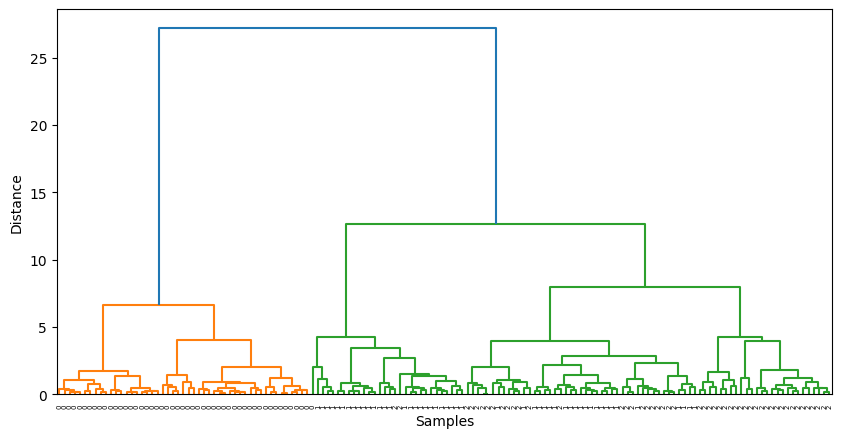

In [78]:
# calculates heirarchical clustering
# method = ward - method used to minimize the variance between clusters and produces more compact clusters
linkage = linkage(df_scaled, method='ward')
plt.figure(figsize=(10,5))
# tree like diagram showing relationship among data points
dendrogram(linkage, labels=data.target)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [80]:
# divide data into 3 clusters use ward linkage method
# In hierarchical clustering, linkage methods determine how distances between clusters are measured.
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
# points belong to which cluster
cluster_labels = agg_cluster.fit_predict(df_scaled)

In [81]:
df['Cluster'] = cluster_labels
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Cluster  
0          1

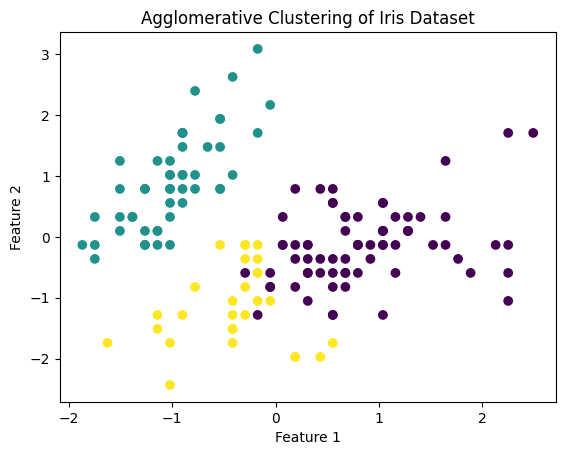

In [82]:
# plotted the points and then colored the points belonging to the same cluster with a single colour for each
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Agglomerative Clustering of Iris Dataset')
plt.show()